<a href="https://colab.research.google.com/github/LukaButskhrikidze/Projects/blob/main/Chicago_Crime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EDA Final Project: Chicago Crime

## 1. Data Exploration and Cleaning

### 1.1 Load Dataset and Import Packages

In [ ]:
# Import Packages
import pandas as pd
from google.colab import drive

In [ ]:
# Mount Google Drive to Colab
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Chicago_Crime_Project/Crimes_Chicago_2019_to_Present.csv')  # read in dataset

In [ ]:
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,0110,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,...,36.0,19.0,01A,1141387.0,1913179.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
1,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,0110,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,...,50.0,13.0,01A,1152781.0,1941458.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
2,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,0620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,47.0,5.0,05,1162518.0,1925906.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
3,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,...,6.0,44.0,08B,1183071.0,1847869.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,1320,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,...,42.0,32.0,14,1174694.0,1901831.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406037 entries, 0 to 1406036
Data columns (total 22 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   ID                    1406037 non-null  int64  
 1   Case Number           1406037 non-null  object 
 2   Date                  1406037 non-null  object 
 3   Block                 1406037 non-null  object 
 4   IUCR                  1406037 non-null  object 
 5   Primary Type          1406037 non-null  object 
 6   Description           1406037 non-null  object 
 7   Location Description  1398479 non-null  object 
 8   Arrest                1406037 non-null  bool   
 9   Domestic              1406037 non-null  bool   
 10  Beat                  1406037 non-null  int64  
 11  District              1406037 non-null  float64
 12  Ward                  1405989 non-null  float64
 13  Community Area        1406034 non-null  float64
 14  FBI Code              1406037 non-

### 1.2 Explore Missingness

In [ ]:
df.isnull().sum()  # check number of missing values per column

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,7558
Arrest,0
Domestic,0


In [ ]:
# Compare rows with location description vs missing location descriptions
no_loc_desc = df[df['Location Description'].isnull()]
yes_loc_desc = df[df['Location Description'].notnull()]

In [ ]:
no_loc_desc['Primary Type'].value_counts()

,count
Primary Type,
DECEPTIVE PRACTICE,7031
BATTERY,129
OTHER OFFENSE,117
BURGLARY,101
ASSAULT,46
THEFT,44
CRIMINAL DAMAGE,35
ROBBERY,17
CRIMINAL SEXUAL ASSAULT,10


In [ ]:
no_loc_desc.groupby('Primary Type')['Description'].value_counts().loc['DECEPTIVE PRACTICE']   # check descriptions by type

,count
Description,
FINANCIAL IDENTITY THEFT OVER $ 300,5571
FINANCIAL IDENTITY THEFT $300 AND UNDER,1236
CREDIT CARD FRAUD,65
FRAUD OR CONFIDENCE GAME,46
ILLEGAL USE CASH CARD,37
COMPUTER FRAUD,31
FORGERY,13
UNLAWFUL USE OF A COMPUTER,7
COUNTERFEIT CHECK,5


In [ ]:
yes_loc_desc['Primary Type'].value_counts()

,count
Primary Type,
THEFT,308285
BATTERY,256153
CRIMINAL DAMAGE,158461
ASSAULT,122957
MOTOR VEHICLE THEFT,99135
DECEPTIVE PRACTICE,95227
OTHER OFFENSE,87976
ROBBERY,51615
WEAPONS VIOLATION,48158


In [ ]:
# compare rows with missing latitude and longitude data and ones with nonmissing
no_loc = df[df['Latitude'].isnull()]
yes_loc = df[df['Latitude'].notnull()]

In [ ]:
no_loc['Primary Type'].value_counts()

,count
Primary Type,
DECEPTIVE PRACTICE,6422
THEFT,4891
NARCOTICS,2576
OTHER OFFENSE,1018
CRIMINAL DAMAGE,770
OFFENSE INVOLVING CHILDREN,599
BATTERY,573
CRIMINAL SEXUAL ASSAULT,442
SEX OFFENSE,353


In [ ]:
yes_loc = df[df['Latitude'].notnull()]

In [ ]:
yes_loc['Primary Type'].value_counts()

,count
Primary Type,
THEFT,303438
BATTERY,255709
CRIMINAL DAMAGE,157726
ASSAULT,122714
MOTOR VEHICLE THEFT,98829
DECEPTIVE PRACTICE,95836
OTHER OFFENSE,87075
ROBBERY,51570
WEAPONS VIOLATION,48035


## 1.3 Clean Data/Resolve Missingness

In [ ]:
df_for_cleaning = df.copy()  # set on copy

In [ ]:
df_for_cleaning.drop(columns=['IUCR', 'FBI Code', 'X Coordinate', 'Y Coordinate'], inplace=True)  # drop unnecessary columns

In [ ]:
df_for_cleaning.columns = df_for_cleaning.columns.str.lower().str.replace(' ', '_')  # reformat column names to machine readable format

In [ ]:
df_for_cleaning.head()

,id,case_number,date,block,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,year,updated_on,latitude,longitude,location
0,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969,"(41.917838056, -87.755968972)"
1,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,13.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355,"(41.995219444, -87.713354912)"
2,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,47.0,5.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975,"(41.952345086, -87.677975059)"
3,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,6.0,44.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856,"(41.737750767, -87.604855911)"
4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,122,1.0,42.0,32.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938,"(41.886018055, -87.633937881)"


In [ ]:
df_for_cleaning = df_for_cleaning.drop(df_for_cleaning[df_for_cleaning['longitude'] < -91].index, axis=0)  # drop outlier location outside Chicago

In [ ]:
df_for_cleaning['address'] = df_for_cleaning['block'].str.replace('X', '0',regex=True) # format addresses for search

In [ ]:
df_for_cleaning[df_for_cleaning['latitude'].isnull()]['address'].head()

,address
35,03100 W 53RD PL
41,02800 S KEELER AVE
43,05100 W WRIGHTWOOD AVE
128,05900 N RAVENSWOOD AVE
251,01200 E 78TH ST


#### Use opencage API to extract Longitude and Latitude Data

In [ ]:
!pip install geopy

In [ ]:

import requests
import time

# The code below calls the opencage api 100 times with the block data for an estimate of the
# Chicago address and returns latitude and longitude data for 100 entries with missing
# lat lon information. This is stored as a csv for later use
"""

API_KEY = ""

# Function to geocode addresses
def get_lat_long_opencage(address):
    full_address = f"{address}, Chicago, IL"
    url = "https://api.opencagedata.com/geocode/v1/json"
    params = {'q': full_address, 'key': API_KEY}
    try:
        response = requests.get(url, params=params)
        if response.status_code == 200:
            result = response.json()
            if result['results']:
                return result['results'][0]['geometry']['lat'], result['results'][0]['geometry']['lng']
        else:
            print(f"Error: {response.status_code}, {response.text}")
    except Exception as e:
        print(f"Error geocoding {full_address}: {e}")
    return None, None

# Filter rows with null Latitude and select the first 100
null_coordinates = df_for_cleaning[df_for_cleaning['Latitude'].isnull()][['ID', 'Block', 'Address']].head(100)

# Batch process addresses
for idx, address in enumerate(null_coordinates['Address']):
    lat, lon = get_lat_long_opencage(address)
    null_coordinates.at[idx, 'Latitude'] = lat
    null_coordinates.at[idx, 'Longitude'] = lon

    # Save progress every 50 rows
    if (idx + 1) % 50 == 0:
        print(f"Processed {idx + 1} addresses")
        null_coordinates.to_csv("/content/drive/My Drive/Chicago_Crime_Project/geocoded_results.csv", index=False)

    time.sleep(1)  # Respect OpenCage rate limit

# Save final results
#null_coordinates.to_csv("/content/drive/My Drive/Chicago_Crime_Project/geocoded_results_final.csv", index=False)

"""

'\n\nAPI_KEY = ""\n\n# Function to geocode addresses\ndef get_lat_long_opencage(address):\n    full_address = f"{address}, Chicago, IL"\n    url = "https://api.opencagedata.com/geocode/v1/json"\n    params = {\'q\': full_address, \'key\': API_KEY}\n    try:\n        response = requests.get(url, params=params)\n        if response.status_code == 200:\n            result = response.json()\n            if result[\'results\']:\n                return result[\'results\'][0][\'geometry\'][\'lat\'], result[\'results\'][0][\'geometry\'][\'lng\']\n        else:\n            print(f"Error: {response.status_code}, {response.text}")\n    except Exception as e:\n        print(f"Error geocoding {full_address}: {e}")\n    return None, None\n\n# Filter rows with null Latitude and select the first 100\nnull_coordinates = df_for_cleaning[df_for_cleaning[\'Latitude\'].isnull()][[\'ID\', \'Block\', \'Address\']].head(100)\n\n# Batch process addresses\nfor idx, address in enumerate(null_coordinates[\'Addre

In [ ]:
updated_coords = pd.read_csv("/content/drive/My Drive/Chicago_Crime_Project/final_locations.csv")  # read in csv with longitude and latitude values

In [ ]:
updated_coords.head()

,ID,Block,Address,Latitude,Longitude
0,12416972,031XX W 53RD PL,03100 W 53RD PL,41.805796,-87.717927
1,12978205,028XX S KEELER AVE,02800 S KEELER AVE,41.740924,-87.558773
2,13041906,051XX W WRIGHTWOOD AVE,05100 W WRIGHTWOOD AVE,41.823008,-87.687462
3,13582742,059XX N RAVENSWOOD AVE,05900 N RAVENSWOOD AVE,41.796376,-87.701363
4,13209581,012XX E 78TH ST,01200 E 78TH ST,41.840381,-87.729420


In [ ]:
df_for_cleaning.set_index('id', inplace=True)  # Set ID as index for efficient updates
updated_coords.set_index('ID', inplace=True)

# Update missing Latitude and Longitude only
df_for_cleaning['latitude'].update(updated_coords['Latitude'])
df_for_cleaning['longitude'].update(updated_coords['Longitude'])

# Reset index to return to original structure
df_for_cleaning.reset_index(inplace=True)


<ipython-input-27-185e6b78ca34>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_for_cleaning['latitude'].update(updated_coords['Latitude'])
<ipython-input-27-185e6b78ca34>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tr

In [ ]:
df_for_cleaning.isnull().sum()  #check missing values after updating lat lon data

,0
id,0
case_number,0
date,0
block,0
primary_type,0
description,0
location_description,7558
arrest,0
domestic,0
beat,0


In [ ]:
df_for_cleaning.drop(columns=['location', 'address'], inplace=True)  # drop unnecesary columns

In [ ]:
df_for_cleaning.head()

,id,case_number,date,block,primary_type,description,location_description,arrest,domestic,beat,district,ward,community_area,year,updated_on,latitude,longitude
0,25953,JE240540,05/24/2021 03:06:00 PM,020XX N LARAMIE AVE,HOMICIDE,FIRST DEGREE MURDER,STREET,True,False,2515,25.0,36.0,19.0,2021,11/18/2023 03:39:49 PM,41.917838,-87.755969
1,26038,JE279849,06/26/2021 09:24:00 AM,062XX N MC CORMICK RD,HOMICIDE,FIRST DEGREE MURDER,PARKING LOT,True,False,1711,17.0,50.0,13.0,2021,11/18/2023 03:39:49 PM,41.995219,-87.713355
2,13279676,JG507211,11/09/2023 07:30:00 AM,019XX W BYRON ST,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,1922,19.0,47.0,5.0,2023,11/18/2023 03:39:49 PM,41.952345,-87.677975
3,13274752,JG501049,11/12/2023 07:59:00 AM,086XX S COTTAGE GROVE AVE,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",SMALL RETAIL STORE,True,False,632,6.0,6.0,44.0,2023,12/09/2023 03:41:24 PM,41.737751,-87.604856
4,13203321,JG415333,09/06/2023 05:00:00 PM,002XX N Wells st,CRIMINAL DAMAGE,TO VEHICLE,PARKING LOT / GARAGE (NON RESIDENTIAL),False,False,122,1.0,42.0,32.0,2023,11/04/2023 03:40:18 PM,41.886018,-87.633938


In [ ]:
df_for_cleaning.to_csv('/content/drive/My Drive/Chicago_Crime_Project/cleaned_df.csv')  # save cleaned dataframe

## 2. General Trends and Overview of Chicago Crimes

### 2.1 Data Exploration

In [ ]:
df_clean = df_for_cleaning.copy()

In [ ]:
df_clean['year'].max()

2024

In [ ]:
df_clean['primary_type'].value_counts()

,count
primary_type,
THEFT,308329
BATTERY,256281
CRIMINAL DAMAGE,158496
ASSAULT,123003
DECEPTIVE PRACTICE,102257
MOTOR VEHICLE THEFT,99140
OTHER OFFENSE,88093
ROBBERY,51631
WEAPONS VIOLATION,48159


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

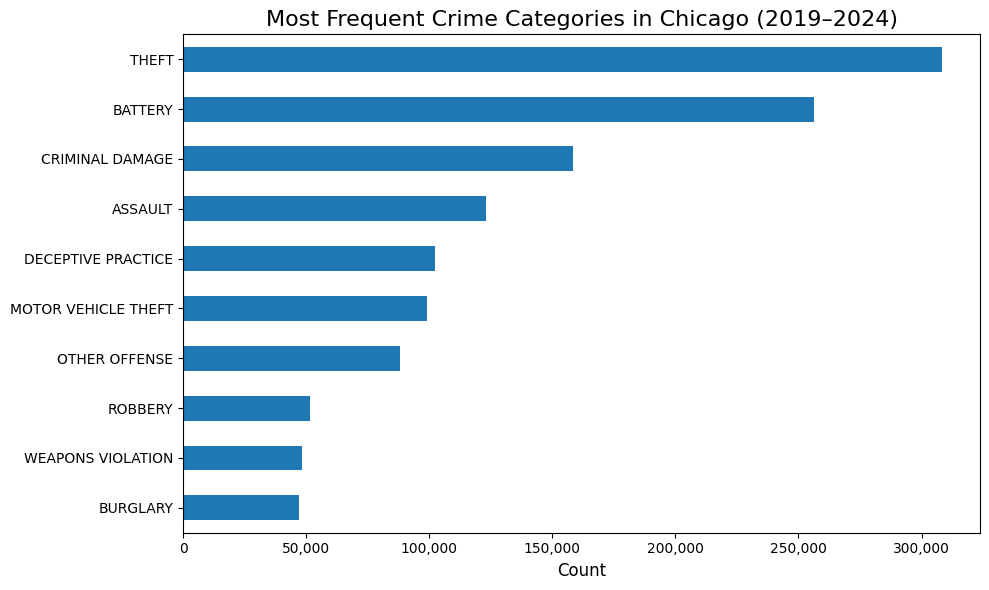

In [ ]:
top_10 = df_clean['primary_type'].value_counts().head(10)

top_10 = top_10[::-1]

# Create a bar chart
plt.figure(figsize=(10, 6))
top_10.plot(kind='barh')
plt.title('Most Frequent Crime Categories in Chicago (2019–2024)', fontsize=16)
plt.xlabel('Count',fontsize=12)
plt.ylabel('')
plt.tight_layout()

from matplotlib.ticker import FuncFormatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# Show the plot
plt.show()

In [ ]:
df.groupby('Primary Type')['Description'].value_counts()

Primary Type       Description                               
ARSON              BY FIRE                                       2195
                   ATTEMPT ARSON                                  330
                   AGGRAVATED                                     246
                   BY EXPLOSIVE                                    46
                   POSSESSION - EXPLOSIVE / INCENDIARY DEVICE      27
                                                                 ... 
WEAPONS VIOLATION  UNLAWFUL SALE - OTHER FIREARM                    7
                   UNLAWFUL SALE HANDGUN                            6
                   DEFACE IDENT MARKS OF FIREARM                    2
                   USE OF METAL PIERCING BULLETS                    2
                   UNLAWFUL SALE OTHER FIREARM                      1
Name: count, Length: 536, dtype: int64

In [ ]:
descriptions_by_type = df.groupby('Primary Type')['Description'].value_counts()

In [ ]:
descriptions_by_type.loc['THEFT']

,count
Description,
$500 AND UNDER,110923
OVER $500,95058
RETAIL THEFT,53317
FROM BUILDING,34695
POCKET-PICKING,8632
ATTEMPT THEFT,2022
PURSE-SNATCHING,1970
THEFT FROM MOTOR VEHICLE,1451
DELIVERY CONTAINER THEFT,182


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406033 entries, 0 to 1406032
Data columns (total 17 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1406033 non-null  int64  
 1   case_number           1406033 non-null  object 
 2   date                  1406033 non-null  object 
 3   block                 1406033 non-null  object 
 4   primary_type          1406033 non-null  object 
 5   description           1406033 non-null  object 
 6   location_description  1398475 non-null  object 
 7   arrest                1406033 non-null  bool   
 8   domestic              1406033 non-null  bool   
 9   beat                  1406033 non-null  int64  
 10  district              1406033 non-null  float64
 11  ward                  1405985 non-null  float64
 12  community_area        1406030 non-null  float64
 13  year                  1406033 non-null  int64  
 14  updated_on            1406033 non-

In [ ]:
df_clean['date'] = pd.to_datetime(df_clean['date'])

<ipython-input-41-709d7b636d96>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_clean['date'] = pd.to_datetime(df_clean['date'])


In [ ]:
df_clean['month'] = df_clean['date'].dt.month
df_clean['time'] = df_clean['date'].dt.time

### 2.2 Visualizations

<ipython-input-45-e776dbcf8a2a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='crime_count', data=crimes, palette='YlGnBu')


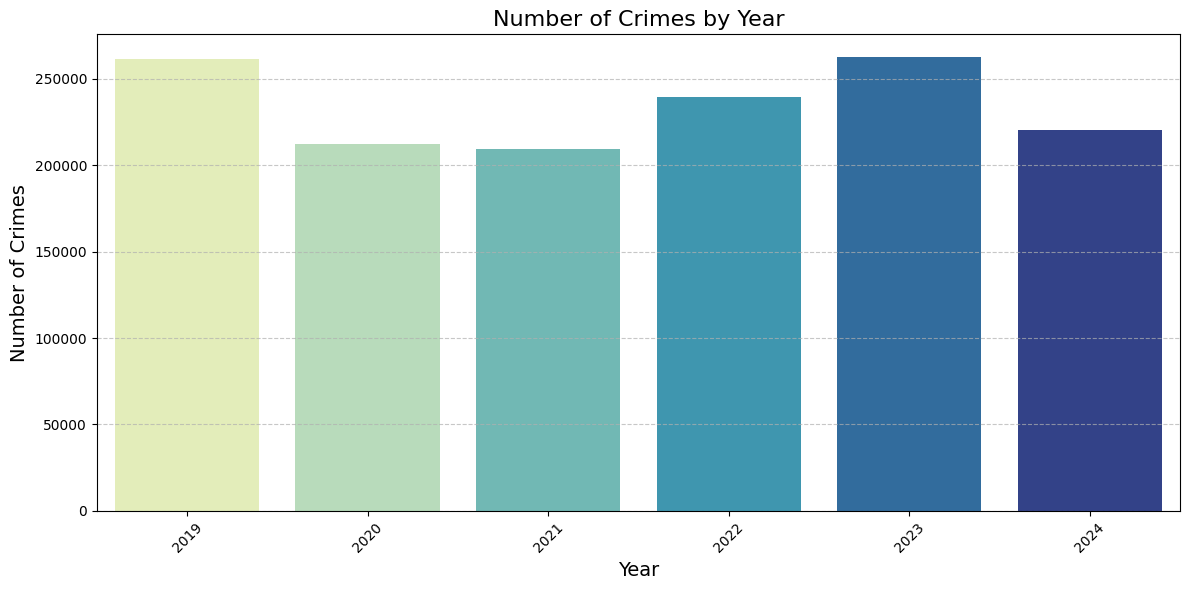

In [ ]:
crimes = df_clean.groupby('year').size().reset_index(name='crime_count')

plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='crime_count', data=crimes, palette='YlGnBu')
plt.title('Number of Crimes by Year', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


Since we want to observe time-series data across crime, for better visibility it is better to make 3x3 charts rather then look at top 10 but have assymetrical figure.

In [ ]:
top_10 = top_10.sort_values(ascending=False)
top_9 = top_10[:9]
top_9 = pd.DataFrame(top_9)
top_9 = top_9.reset_index()
top_9 = list(top_9['primary_type'])
top_9

['THEFT',
 'BATTERY',
 'CRIMINAL DAMAGE',
 'ASSAULT',
 'DECEPTIVE PRACTICE',
 'MOTOR VEHICLE THEFT',
 'OTHER OFFENSE',
 'ROBBERY',
 'WEAPONS VIOLATION']

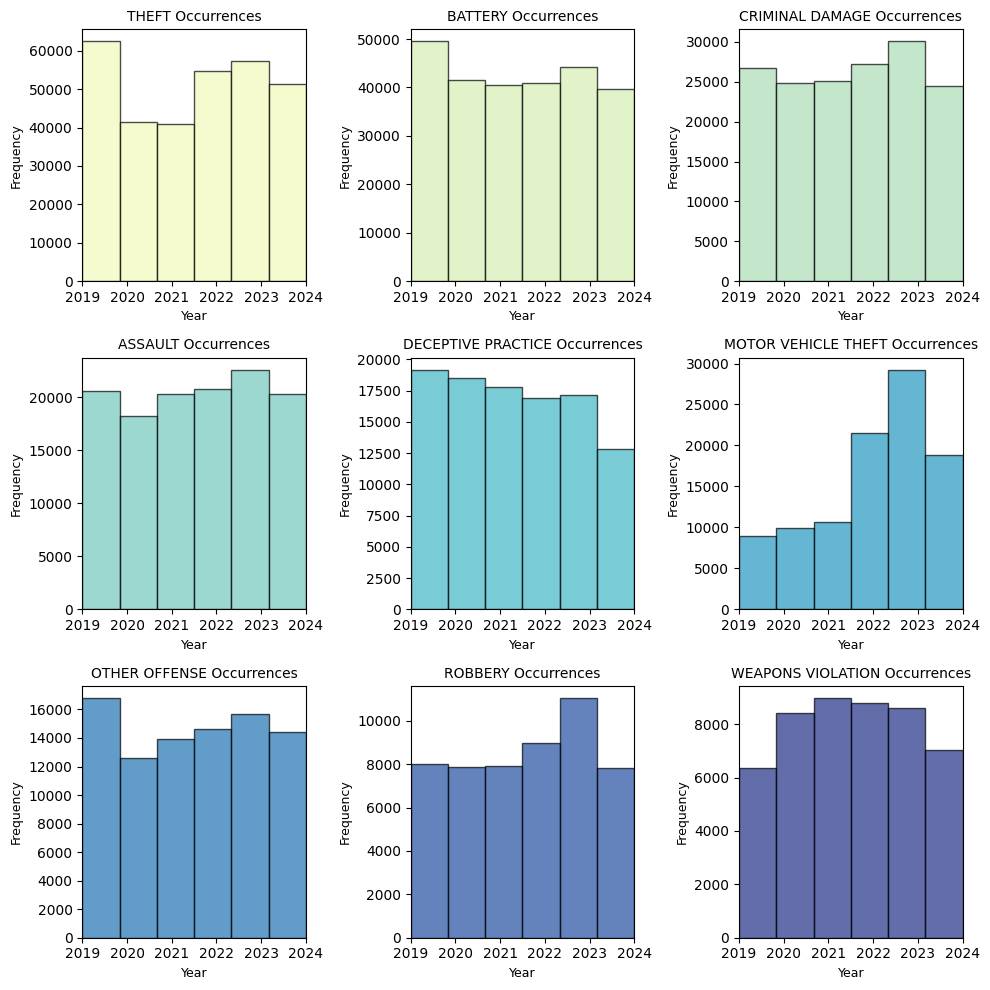

In [ ]:
nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(10, 10))

axes = axes.flatten()

palette = sns.color_palette("YlGnBu", len(top_9))

for i, (crime, color) in enumerate(zip(top_9, palette)):
    crime_data = df_clean[df_clean['primary_type'] == crime]

    if not crime_data.empty:
        min_year, max_year = crime_data['year'].min(), crime_data['year'].max()
        axes[i].hist(
            crime_data['year'],
            bins=6,
            edgecolor='black',
            range=(min_year, max_year),
            color=color,
            alpha=0.7
        )
        axes[i].set_title(f'{crime} Occurrences', fontsize=10)
        axes[i].set_xlabel('Year', fontsize=9)
        axes[i].set_ylabel('Frequency', fontsize=9)
        axes[i].set_xlim(min_year, max_year)
    else:
        axes[i].set_visible(False)

plt.tight_layout()
plt.show()


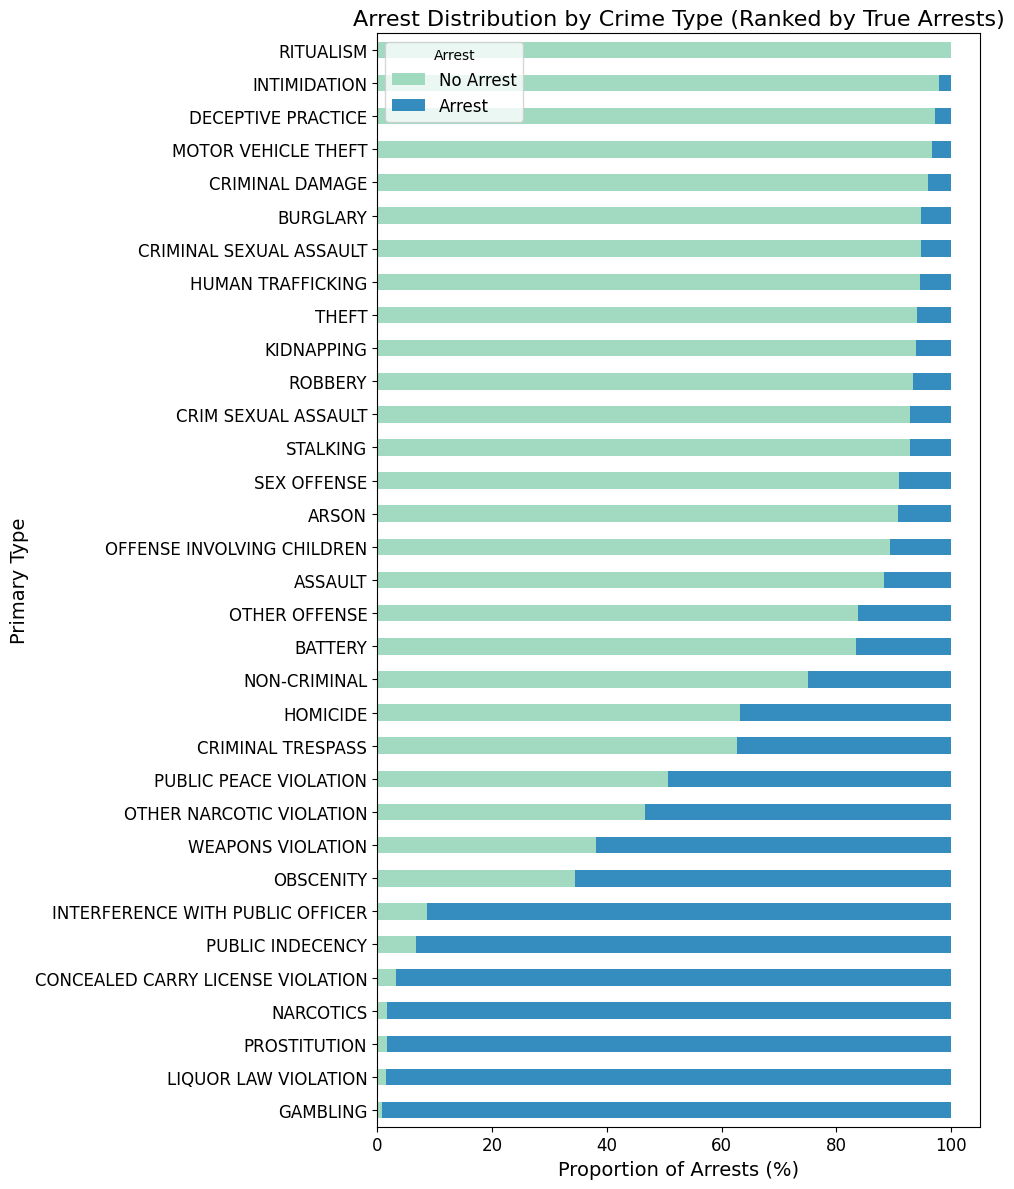

In [ ]:
arrest_distribution = df_clean.groupby(['primary_type', 'arrest']).size().unstack(fill_value=0)
arrest_distribution_percentage = arrest_distribution.div(arrest_distribution.sum(axis=1), axis=0) * 100
arrest_distribution_percentage = arrest_distribution_percentage.sort_values(by=True, ascending=False)
colors = sns.color_palette("YlGnBu", 2)

fig, ax = plt.subplots(figsize=(10, 12))

arrest_distribution_percentage.plot(
    kind='barh',
    stacked=True,
    ax=ax,
    color=colors,
    alpha=0.9
)

ax.set_title('Arrest Distribution by Crime Type (Ranked by True Arrests)', fontsize=16)
ax.set_xlabel('Proportion of Arrests (%)', fontsize=14)
ax.set_ylabel('Primary Type', fontsize=14)
ax.legend(title='Arrest', labels=['No Arrest', 'Arrest'], fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

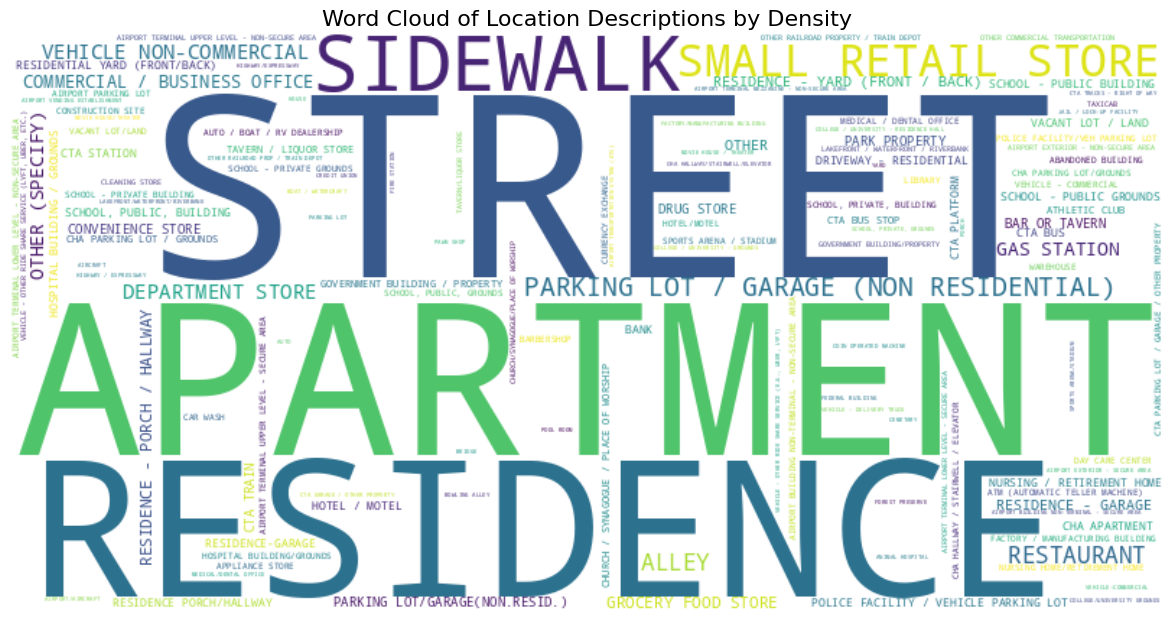

In [ ]:
location_counts = df_clean['location_description'].value_counts()

from wordcloud import WordCloud

wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='viridis'
).generate_from_frequencies(location_counts)

plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Location Descriptions by Density', fontsize=16)
plt.show()


## 3. Seasonality and Time-of-Day Effects in Crime

In [ ]:
from datetime import time

def classify_daylight_or_night(month, event_time):
    # Define sunrise and sunset times as datetime.time objects
    if month in [3, 4, 5]:  # Spring
        sunrise, sunset = time(6, 0), time(19, 0)  # 6:00 AM to 7:00 PM
    elif month in [6, 7, 8]:  # Summer
        sunrise, sunset = time(5, 0), time(20, 0)  # 5:00 AM to 8:00 PM
    elif month in [9, 10, 11]:  # Fall
        sunrise, sunset = time(6, 0), time(18, 0)  # 6:00 AM to 6:00 PM
    else:  # Winter
        sunrise, sunset = time(7, 0), time(17, 0)  # 7:00 AM to 5:00 PM

    return "Daylight" if sunrise <= event_time < sunset else "Nighttime"

df_clean['daylight_or_night'] = df_clean.apply(lambda x: classify_daylight_or_night(x['month'], x['time']), axis=1)

print(df_clean)


               id case_number                date                      block  \
0           25953    JE240540 2021-05-24 15:06:00        020XX N LARAMIE AVE   
1           26038    JE279849 2021-06-26 09:24:00      062XX N MC CORMICK RD   
2        13279676    JG507211 2023-11-09 07:30:00           019XX W BYRON ST   
3        13274752    JG501049 2023-11-12 07:59:00  086XX S COTTAGE GROVE AVE   
4        13203321    JG415333 2023-09-06 17:00:00           002XX N Wells st   
...           ...         ...                 ...                        ...   
1406028  13047495    JG229914 2023-04-18 08:00:00       003XX N JEFFERSON ST   
1406029  13168300    JG373901 2023-08-07 18:00:00            0000X W 95TH ST   
1406030  13114024    JG309527 2023-06-20 19:00:00          031XX S AVERS AVE   
1406031  13188860    JG398340 2023-08-26 00:00:00     078XX S SOUTH SHORE DR   
1406032  13126372    JG324067 2023-07-01 19:29:00           005XX S WELLS ST   

                primary_type  \
0      

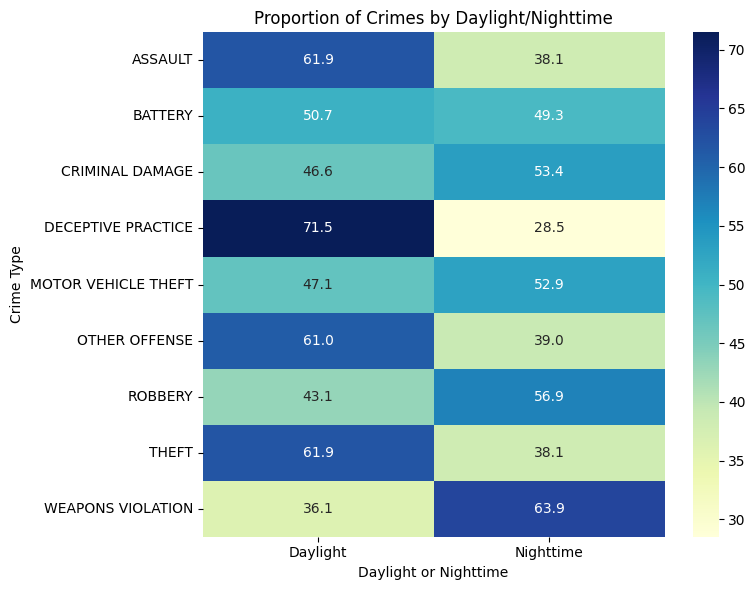

In [ ]:
pivot_table = df_clean[df_clean['primary_type'].isin(top_9)].pivot_table(
    index='primary_type',
    columns='daylight_or_night',
    aggfunc='size',
    fill_value=0
)

row_totals = pivot_table.sum(axis=1).values[:, None]
pivot_table = (pivot_table / row_totals) * 100

plt.figure(figsize=(8, 6))
sns.color_palette("light:#5A9", as_cmap=True)
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap = 'YlGnBu', cbar=True)

plt.title("Proportion of Crimes by Daylight/Nighttime")
plt.xlabel("Daylight or Nighttime")
plt.ylabel("Crime Type")
plt.tight_layout()
plt.show()


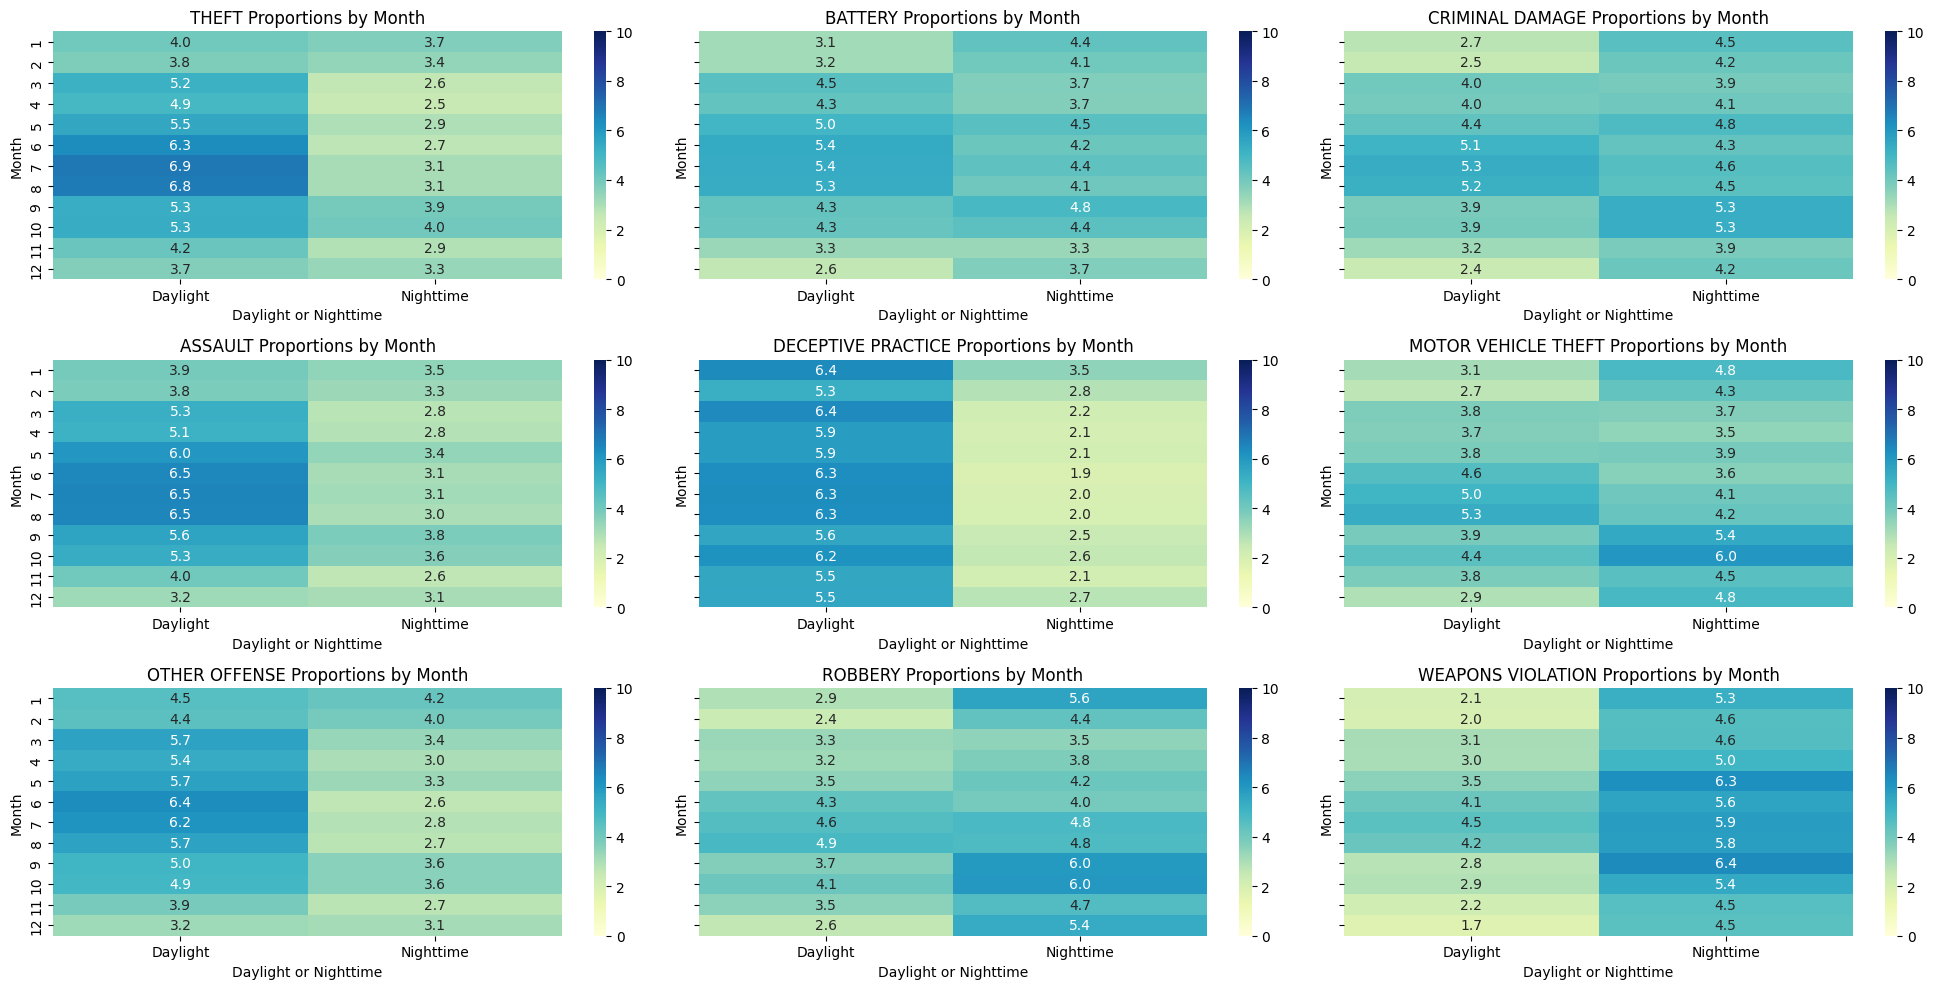

In [ ]:
pivot_tables = {}

for crime in top_9:
    filtered_df = df_clean[df_clean['primary_type'] == crime]
    if not filtered_df.empty:
        raw_pivot = pd.pivot_table(
            filtered_df,
            index='month',
            columns='daylight_or_night',
            aggfunc='size',
            fill_value=0
        )
        # Normalize the entire pivot table to sum to 100%
        total_sum = raw_pivot.values.sum()
        pivot_tables[crime] = (raw_pivot / total_sum) * 100  # Normalize entire table
    else:
        pivot_tables[crime] = pd.DataFrame(0, index=range(1, 13), columns=['Daylight', 'Nighttime'])

nrows, ncols = 3, 3
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 10), sharey=True)

axes = axes.flatten()

for ax, (crime, pivot_table) in zip(axes, pivot_tables.items()):
    sns.heatmap(
        pivot_table,
        annot=True,
        cmap='YlGnBu',
        fmt='.1f',
        vmin=0,
        vmax=10,
        ax=ax
    )
    ax.set_title(f'{crime} Proportions by Month')
    ax.set_xlabel('Daylight or Nighttime')
    ax.set_ylabel('Month')

for extra_ax in axes[len(pivot_tables):]:
    extra_ax.set_visible(False)

plt.tight_layout()
plt.show()


## 4. Spatial Relationships

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd
import geodatasets as gds
import folium
from folium import Choropleth
from shapely import wkt
from google.colab import drive

# Set paths for geopandas data for socioecomically disadvantaged areas and population census measures

chicago_boundary_path = "/content/drive/My Drive/Chicago_Crime_Project/Supplementary_Data_For_Spatial_Analysis/chicago_boundary.geojson"
City_Boundary_20241211_path = "/content/drive/My Drive/Chicago_Crime_Project/Supplementary_Data_For_Spatial_Analysis/City_Boundary_20241211.csv"
# https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-City/ewy2-6yfk


Socioeconomically_Disadvantaged_Areas_20241211_path = "/content/drive/My Drive/Chicago_Crime_Project/Supplementary_Data_For_Spatial_Analysis/Socioeconomically Disadvantaged Areas_20241211.geojson"
# https://data.cityofchicago.org/Community-Economic-Development/Socioeconomically-Disadvantaged-Areas/2ui7-wiq8/about_data

Community_Areas_Population_2022_path = "/content/drive/My Drive/Chicago_Crime_Project/Supplementary_Data_For_Spatial_Analysis/Community_Areas_Population_2022.csv"
# https://www.actforchildren.org/wp-content/uploads/2024/03/Census-Data-by-Chicago-Community-Area-2022.pdf

# All spatial folium plots to be saved here
Folium_plot_path = "/content/drive/My Drive/Chicago_Crime_Project/folium_spatial_html_plots/"
crime_counts.head()


primary_type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,OTHER OFFENSE,ROBBERY,THEFT,WEAPONS VIOLATION
community_area,,,,,,,,,,
1,303,676,96,427,180,299,238,99,1139,41
2,255,539,108,420,283,340,212,111,732,24
3,324,723,156,351,290,242,178,102,1218,30
4,132,261,86,198,138,148,91,46,506,8
5,62,121,89,147,124,117,57,36,345,4


In [ ]:
# Load in cleaned data
drive.mount('/content/drive')
df= pd.read_csv('/content/drive/My Drive/Chicago_Crime_Project/cleaned_df.csv') # Changed to /content/drive
df.head()
df.columns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Index(['Unnamed: 0', 'id', 'case_number', 'date', 'block', 'primary_type',
       'description', 'location_description', 'arrest', 'domestic', 'beat',
       'district', 'ward', 'community_area', 'year', 'updated_on', 'latitude',
       'longitude'],
      dtype='object')

In [ ]:
df['primary_type'].value_counts()


,count
primary_type,
THEFT,308329
BATTERY,256281
CRIMINAL DAMAGE,158496
ASSAULT,123003
DECEPTIVE PRACTICE,102257
MOTOR VEHICLE THEFT,99140
OTHER OFFENSE,88093
ROBBERY,51631
WEAPONS VIOLATION,48159


In [ ]:
# Use the top ten crimes
top_10_crimes = df['primary_type'].value_counts().head(10).index
df = df[df['primary_type'].isin(top_10_crimes)]
# only use 2024
df = df[df['year'] == 2024]
df = df.dropna(subset=['latitude', 'longitude']) # Dropping the rows without Coordinates.
df['community_area'].nunique() # Find unique community areas
crime_counts = df.groupby(['community_area', 'primary_type']).size().unstack(fill_value=0) # Group by community area, and crime type (top 10)
crime_counts.head()

primary_type,ASSAULT,BATTERY,BURGLARY,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,MOTOR VEHICLE THEFT,OTHER OFFENSE,ROBBERY,THEFT,WEAPONS VIOLATION
community_area,,,,,,,,,,
1.0,303,676,96,427,180,299,238,99,1139,41
2.0,255,539,108,420,283,340,212,111,732,24
3.0,324,723,156,351,290,242,178,102,1218,30
4.0,132,261,86,198,138,148,91,46,506,8
5.0,62,121,89,147,124,117,57,36,345,4


In [ ]:
# import chicago community area geopandas geometry dataframe and merge with crime data counts

chicago = gpd.read_file(gds.get_path("geoda.chicago_commpop")) # Contains community area geometry boundaries and some other information

chicago['NID'] = chicago['NID'].astype(int) # NID is standardized community area ID
crime_counts.index = crime_counts.index.astype(int) # Sum crime counts for each community area

merged = chicago.merge(crime_counts, left_on='NID', right_index=True, how='left') # Merge with chicago geodf

merged.iloc[:, 9:] = merged.iloc[:, 9:].fillna(0) # There aren't any missing values, but just in case
merged['Total'] = merged.iloc[:, 9:].sum(axis=1) # Create a total crime counts column
merged['Total_percentage'] = merged['Total'] / merged['Total'].sum() * 100 # Percentage
print(merged.head())


         community  NID  POP2010  POP2000  POPCH   POPPERCH  popplus  popneg  \
0          DOUGLAS   35    18238    26470  -8232 -31.099358        0       1   
1          OAKLAND   36     5918     6110   -192  -3.142390        0       1   
2      FULLER PARK   37     2876     3420   -544 -15.906433        0       1   
3  GRAND BOULEVARD   38    21929    28006  -6077 -21.698922        0       1   
4          KENWOOD   39    17841    18363   -522  -2.842673        0       1   

                                            geometry  ASSAULT  ...  BURGLARY  \
0  MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...      244  ...        57   
1  MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ...       77  ...        20   
2  MULTIPOLYGON (((-87.6288 41.80189, -87.62879 4...       66  ...        19   
3  MULTIPOLYGON (((-87.60671 41.81681, -87.6067 4...      320  ...       113   
4  MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ...      167  ...        48   

   CRIMINAL DAMAGE  DECEPTIVE PRACTICE

In [ ]:
# import Socioenconomic data and geopandas geometry boundary for chicago

pvrty_map = gpd.read_file(Socioeconomically_Disadvantaged_Areas_20241211_path) # Load in socioeconomy csv
boundary_csv = pd.read_csv(City_Boundary_20241211_path) # Load in city boundary geometry boundary (for plot aesthetics)
boundary_csv['geometry'] = boundary_csv['the_geom'].apply(wkt.loads)

chicago_boundary = gpd.GeoDataFrame(boundary_csv, geometry='geometry')
chicago_boundary.set_crs("EPSG:4326", inplace=True) # set common coordinates
chicago_boundary.to_file("chicago_boundary.geojson", driver='GeoJSON') # save as geojson

In [ ]:
# Import population data, create a copy df, and merge, also normalize crime frequencies

population = pd.read_csv(Community_Areas_Population_2022_path)
population['Community_number'] = population['Community_number'].astype(int)
population['Total_population'] = population['Total_population'].str.replace(',', '').astype(int) # remove punctuation

# drop all columns except the community number and total population
population = population[['Community_number', 'Total_population']]
# create a copy of the merged dataframe to add the population data
merged_population = merged.copy()
merged_population = merged_population.merge(population, left_on='NID', right_on='Community_number', how='left')
# normalize the "Total" column by "Total_population"
merged_population['Total_percentage'] = merged_population['Total'] / merged_population['Total_population']
# print(merged_population.head())
# Create a assault_norm column normalized by population
merged_population['Assault_norm'] = merged_population['ASSAULT'] / merged_population['Total_population']
# Create a robbery_norm column normalized by population
merged_population['Theft_norm'] = merged_population['THEFT'] / merged_population['Total_population']


merged_population.columns

Index(['community', 'NID', 'POP2010', 'POP2000', 'POPCH', 'POPPERCH',
       'popplus', 'popneg', 'geometry', 'ASSAULT', 'BATTERY', 'BURGLARY',
       'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE', 'MOTOR VEHICLE THEFT',
       'OTHER OFFENSE', 'ROBBERY', 'THEFT', 'WEAPONS VIOLATION', 'Total',
       'Total_percentage', 'Community_number', 'Total_population',
       'Assault_norm', 'Theft_norm'],
      dtype='object')

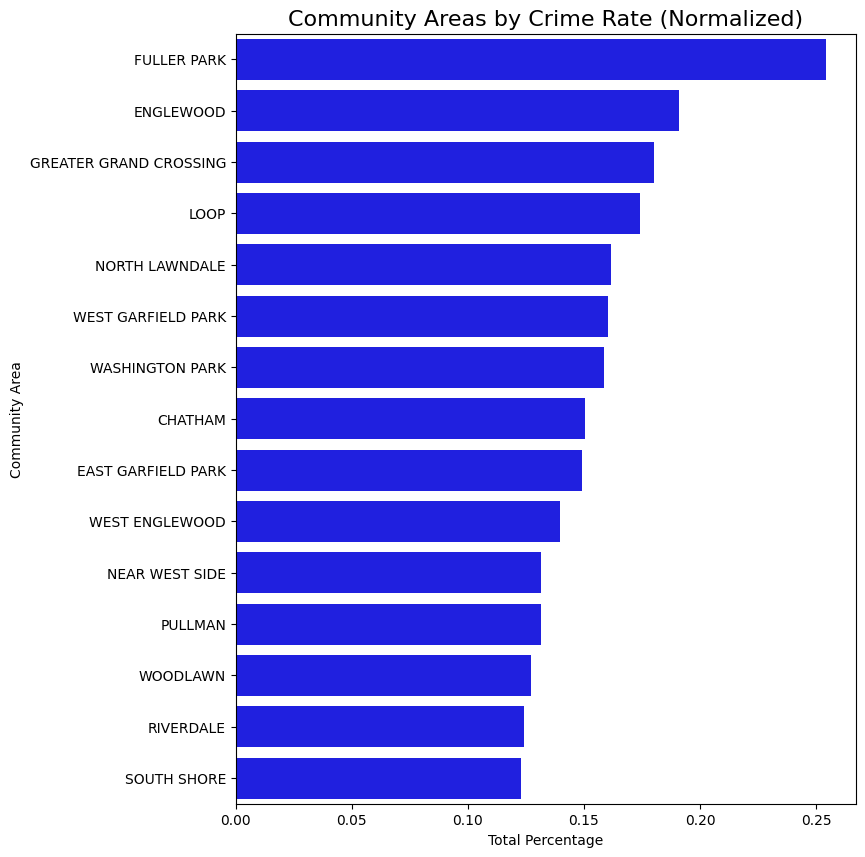

In [ ]:
# Create a bar plot with the top 15 community areas by crime rate (normalized)
plt.figure(figsize=(8, 10))
sns.barplot(x='Total_percentage', y='community', data=merged_population.sort_values('Total_percentage', ascending=False).head(15), color='blue')
plt.title('Community Areas by Crime Rate (Normalized)', fontsize=16)
plt.xlabel('Total Percentage')
plt.ylabel('Community Area')
plt.show()

In [ ]:
# POPULATION HEATMAP WITH NO LABELS

# Create the base map
m = folium.Map(
    location=[41.8781, -87.6298],
    zoom_start=10,
    tiles="cartodbpositron"  # Minimalist tile style
)

# Add a choropleth layer (crime data)
folium.Choropleth(
    geo_data=merged_population,
    data=merged_population,
    columns=["community", "Total_population"],
    key_on="feature.properties.community",
    # change fill color to blue
    fill_color="Blues",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name="Population"
).add_to(m)


# Ensure centroids are calculated
#merged['centroid_x'] = merged['geometry'].centroid.x
#merged['centroid_y'] = merged['geometry'].centroid.y

# Add text labels to the map
#for _, row in merged.iterrows():
 #   folium.map.Marker(
 #       [row['centroid_y'], row['centroid_x']],
 #       icon=folium.DivIcon(
#            html=f"""<div style="font-size: 15px; color: black;">{row['NID']}</div>"""
#        ),
#    ).add_to(m)

# Add the poverty map (adjust color and opacity, remove blue border)
folium.GeoJson(
    pvrty_map,
    style_function=lambda x: {
        'fillColor': 'red',  # Fill color for the polygons
        'fillOpacity': 0.4, # Opacity of the fill
        'color': 'none',    # Remove the stroke (border)
        'weight': 0         # Set border thickness to 0
    }
).add_to(m)

# Add the boundary layer for Chicago
folium.GeoJson(
    chicago_boundary,
    style_function=lambda x: {
        'color': 'black',       # Boundary color
        'weight': 1.5,           # Boundary thickness
        'fillOpacity': 0.0       # No fill for the boundary
    }
).add_to(m)

# Add a layer control toggle
folium.LayerControl().add_to(m)

# Save the map
m.save(Folium_plot_path+"chicago_population_heatmap.html")

In [ ]:
# CRIME FREQUENCY HEATMAP WITH LABELS

# Create the base map
m = folium.Map(
    location=[41.8781, -87.6298],
    zoom_start=10,
    tiles="cartodbpositron"  # Minimalist tile style
)

# Add a choropleth layer (crime data)
folium.Choropleth(
    geo_data=merged_population,
    data=merged_population,
    columns=["community", "Total"],
    key_on="feature.properties.community",
    # change fill color to blue
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name="Population"
).add_to(m)


# Ensure centroids are calculated
merged['centroid_x'] = merged['geometry'].centroid.x
merged['centroid_y'] = merged['geometry'].centroid.y

# Add text labels to the map
for _, row in merged.iterrows():
    folium.map.Marker(
        [row['centroid_y'], row['centroid_x']],
        icon=folium.DivIcon(
            html=f"""<div style="font-size: 15px; color: black;">{row['NID']}</div>"""
        ),
    ).add_to(m)

# Add the poverty map (adjust color and opacity, remove blue border)
folium.GeoJson(
    pvrty_map,
    style_function=lambda x: {
        'fillColor': 'red',  # Fill color for the polygons
        'fillOpacity': 0.4, # Opacity of the fill
        'color': 'none',    # Remove the stroke (border)
        'weight': 0         # Set border thickness to 0
    }
).add_to(m)

# Add the boundary layer for Chicago
folium.GeoJson(
    chicago_boundary,
    style_function=lambda x: {
        'color': 'black',       # Boundary color
        'weight': 1.5,           # Boundary thickness
        'fillOpacity': 0.0       # No fill for the boundary
    }
).add_to(m)

# Add a layer control toggle
folium.LayerControl().add_to(m)

# Save the map
m.save(Folium_plot_path+"chicago_crime_frequency_heatmap_with_text_labels.html")

<ipython-input-40-5c1651883401>:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['centroid_x'] = merged['geometry'].centroid.x
<ipython-input-40-5c1651883401>:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['centroid_y'] = merged['geometry'].centroid.y


In [ ]:
# CRIME Normalized by Population HEATMAP WITH LABELS

# Create the base map
m = folium.Map(
    location=[41.8781, -87.6298],
    zoom_start=10,
    tiles="cartodbpositron"  # Minimalist tile style
)

# Add a choropleth layer (crime data)
folium.Choropleth(
    geo_data=merged_population,
    data=merged_population,
    columns=["community", "Total_percentage"],
    key_on="feature.properties.community",
    # change fill color to blue
    fill_color="YlGn",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name="Population"
).add_to(m)


# Ensure centroids are calculated
merged['centroid_x'] = merged['geometry'].centroid.x
merged['centroid_y'] = merged['geometry'].centroid.y

# Add text labels to the map
for _, row in merged.iterrows():
    folium.map.Marker(
        [row['centroid_y'], row['centroid_x']],
        icon=folium.DivIcon(
            html=f"""<div style="font-size: 15px; color: black;">{row['NID']}</div>"""
        ),
    ).add_to(m)

# Add the poverty map (adjust color and opacity, remove blue border)
folium.GeoJson(
    pvrty_map,
    style_function=lambda x: {
        'fillColor': 'red',  # Fill color for the polygons
        'fillOpacity': 0.4, # Opacity of the fill
        'color': 'none',    # Remove the stroke (border)
        'weight': 0         # Set border thickness to 0
    }
).add_to(m)

# Add the boundary layer for Chicago
folium.GeoJson(
    chicago_boundary,
    style_function=lambda x: {
        'color': 'black',       # Boundary color
        'weight': 1.5,           # Boundary thickness
        'fillOpacity': 0.0       # No fill for the boundary
    }
).add_to(m)

# Add a layer control toggle
folium.LayerControl().add_to(m)

# Save the map
m.save(Folium_plot_path+"chicago_crime_normalized_heatmap_with_text_labels.html")

<ipython-input-41-965170943ae9>:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['centroid_x'] = merged['geometry'].centroid.x
<ipython-input-41-965170943ae9>:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['centroid_y'] = merged['geometry'].centroid.y


In [ ]:
# HEATMAP OF ASSAULTS


# Create the base map
m = folium.Map(
    location=[41.8781, -87.6298],
    zoom_start=10,
    tiles="cartodbpositron"  # Minimalist tile style
)

# Add a choropleth layer (crime data)
folium.Choropleth(
    geo_data=merged_population,
    data=merged_population,
    columns=["community", "Assault_norm"],
    key_on="feature.properties.community",
    # change fill color to greys
    fill_color="Greys",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name="Population"
).add_to(m)


# Ensure centroids are calculated
merged['centroid_x'] = merged['geometry'].centroid.x
merged['centroid_y'] = merged['geometry'].centroid.y

# Add text labels to the map
#for _, row in merged.iterrows():
 #   folium.map.Marker(
 #       [row['centroid_y'], row['centroid_x']],
 #       icon=folium.DivIcon(
#            html=f"""<div style="font-size: 15px; color: black;">{row['NID']}</div>"""
#        ),
#    ).add_to(m)

# Add the poverty map (adjust color and opacity, remove blue border)
folium.GeoJson(
    pvrty_map,
    style_function=lambda x: {
        'fillColor': 'Red',  # Fill color for the polygons
        'fillOpacity': 0.25, # Opacity of the fill
        'color': 'none',    # Remove the stroke (border)
        'weight': 0         # Set border thickness to 0
    }
).add_to(m)

# Add the boundary layer for Chicago
folium.GeoJson(
    chicago_boundary,
    style_function=lambda x: {
        'color': 'black',       # Boundary color
        'weight': 1.5,           # Boundary thickness
        'fillOpacity': 0.0       # No fill for the boundary
    }
).add_to(m)

# Add a layer control toggle
folium.LayerControl().add_to(m)

# Save the map
m.save(Folium_plot_path+"chicago_assault_heatmap.html")

<ipython-input-42-36af3e72059e>:26: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['centroid_x'] = merged['geometry'].centroid.x
<ipython-input-42-36af3e72059e>:27: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['centroid_y'] = merged['geometry'].centroid.y


In [ ]:
# HEATMAP OF THEFTS NORMALIZED
# Create the base map
m = folium.Map(
    location=[41.8781, -87.6298],
    zoom_start=10,
    tiles="cartodbpositron"  # Minimalist tile style
)

# Add a choropleth layer (crime data)
folium.Choropleth(
    geo_data=merged_population,
    data=merged_population,
    columns=["community", "Theft_norm"],
    key_on="feature.properties.community",
    # change fill color to purple
    fill_color="Purples",
    fill_opacity=0.8,
    line_opacity=0.2,
    legend_name="Population"
).add_to(m)


# Ensure centroids are calculated
merged['centroid_x'] = merged['geometry'].centroid.x
merged['centroid_y'] = merged['geometry'].centroid.y

# Add text labels to the map
#for _, row in merged.iterrows():
 #   folium.map.Marker(
 #       [row['centroid_y'], row['centroid_x']],
 #       icon=folium.DivIcon(
#            html=f"""<div style="font-size: 15px; color: black;">{row['NID']}</div>"""
#        ),
#    ).add_to(m)

# Add the poverty map (adjust color and opacity, remove blue border)
folium.GeoJson(
    pvrty_map,
    style_function=lambda x: {
        'fillColor': 'red',  # Fill color for the polygons
        'fillOpacity': 0.25, # Opacity of the fill
        'color': 'none',    # Remove the stroke (border)
        'weight': 0         # Set border thickness to 0
    }
).add_to(m)

# Add the boundary layer for Chicago
folium.GeoJson(
    chicago_boundary,
    style_function=lambda x: {
        'color': 'black',       # Boundary color
        'weight': 1.5,           # Boundary thickness
        'fillOpacity': 0.0       # No fill for the boundary
    }
).add_to(m)

# Add a layer control toggle
folium.LayerControl().add_to(m)

# Save the map
m.save(Folium_plot_path+"chicago_Theft_heatmap.html")

<ipython-input-43-b5ad783741eb>:24: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['centroid_x'] = merged['geometry'].centroid.x
<ipython-input-43-b5ad783741eb>:25: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged['centroid_y'] = merged['geometry'].centroid.y
